### Support Vector Machines
In the first part of this exercise, you will  build  support vector machines
(SVMs) for solving  binary classification problems. You will experiment with your
classifier on three example 2D datasets. Experimenting with these datasets
will help you gain  intuition into how SVMs work and how to use a Gaussian
kernel with SVMs. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

### Data set 1
We will begin  with a 2D example dataset which can be separated by a
linear boundary.  In
this dataset, the positions of the positive examples (green circles) and the
negative examples (indicated with red circles) suggest a natural separation indicated
by the gap. However, notice that there is an outlier positive example  on
the far left at about (0.1, 4.1). As part of this exercise, you will also see how
this outlier affects the SVM decision boundary.

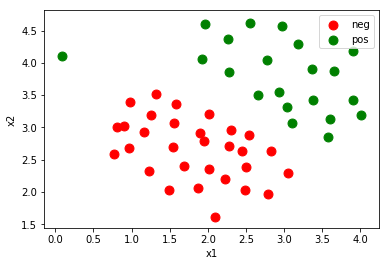

In [2]:
import linear_svm
import utils
from sklearn import preprocessing, metrics
from linear_classifier import LinearSVM_twoclass

############################################################################
#  Part  0: Loading and Visualizing Data                                   #
#  We start the exercise by first loading and visualizing the dataset.     #
#  The following code will load the dataset into your environment and plot #
#  the data.                                                               #
############################################################################

# load ex4data1.mat

X,y = utils.load_mat('data/ex4data1.mat')

utils.plot_twoclass_data(X,y,'x1', 'x2',['neg','pos'])
plt.show()

### The hinge loss function and gradient
Now you will implement the hinge loss cost function and its gradient for support vector machines.
Complete the **binary\_svm\_loss** function in **linear\_svm.py**  to return the cost and gradient for the hinge loss function.
 Recall that the hinge loss function is
$$ J(\theta) = \frac{1}{2m} \sum_{j=0}^{d} {\theta_j}^2 + \frac{C}{m} \sum_{i=1}^{m} max(0, 1 -y^{(i)}h_\theta(x^{(i)})) $$

where $h_{\theta}(x) = \theta^ T x$ with $x_0 = 1$.  $C$ is the penalty factor which measures how much misclassifications are penalized. If $y^{(i)}h_\theta(x^{(i)})) > 1$, then $x^{(i)}$ is correctly classified and the loss associated with that example is zero. If $y^{(i)}h_\theta(x^{(i)})) < 1$, then $x^{(i)}$ is not within the appropriate margin (positive or negative) and the loss associated with that example is greater than zero. The gradient of the hinge loss
function  is a vector of the same length as $\theta$ where the $j^{th}$ element, $j=0,1,\ldots,d$ is defined as follows:

\begin{eqnarray*} \frac{\partial J(\theta)}{\partial \theta_j}  & = &
\left \{
\begin{array}{l l}
\frac{1}{m} \theta_j + \frac{C}{m} \sum_{i=1}^{m} -y^{(i)}x_j^{(i)}& \mbox{ if } y^{(i)}h_\theta(x^{(i)})) < 1\\
\frac{1}{m} \theta_j & \mbox{ if } y^{(i)}h_\theta(x^{(i)})) >= 1\\
\end{array} \right. 
\end{eqnarray*}

Once you are done, the cell below will call your **binary\_svm\_loss** function with a zero vector $\theta$.
 You should see that the cost $J$ is 1.0. The gradient of the loss function with respect to an all-zeros $\theta$ vector is also computed and should be $[-0.12956186 -0.00167647]^T$.

In [3]:
############################################################################
#  Part 1: Hinge loss function and gradient                                #
############################################################################

C = 1
theta = np.zeros((X.shape[1],))

yy = np.ones(y.shape)
yy[y==0] = -1
J,grad = linear_svm.binary_svm_loss(theta,X,yy,C)

print("J = %.4f grad = %s" %(J,grad))

J = 1.0000 grad = [-0.12956186 -0.00167647]


### Impact of varying C
In this part of the exercise, you will try using different values of the C
parameter with SVMs. Informally, the C parameter is a positive value that
controls the penalty for misclassified training examples. A large C parameter
tells the SVM to try to classify all the examples correctly. C plays a role
similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using
previously for logistic regression.

The SVM training function is in **linear\_classifier.py** -- this is a gradient descent algorithm that uses your loss and gradient functions. 
The cell below will train an SVM on the example data set 1 with C = 1. It first scales the data to have zero mean and unit variance, and adds the intercept term to the data matrix.
When C = 1, you should find that the SVM puts the decision boundary in
the gap between the two datasets and misclassifies the data point on the far
left. 

Your task is to try different values of C on this dataset. Specifically, you
should change the value of C in the cell below to C = 100 and run the SVM
training again. When C = 100, you should find that the SVM now classifies
every single example correctly, but has a decision boundary that does not
appear to be a natural fit for the data. Include a plot of the decision boundary for C = 100 in writeup.pdf.

Accuracy on training data = 1.000


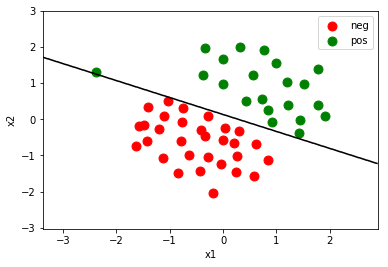

In [32]:
############################################################################
# Scale the data and set up the SVM training                               #
############################################################################

# scale the data

scaler = preprocessing.StandardScaler().fit(X)
scaleX = scaler.transform(X)

# add an intercept term and convert y values from [0,1] to [-1,1]

XX = np.array([(1,x1,x2) for (x1,x2) in scaleX])
yy = np.ones(y.shape)
yy[y == 0] = -1
yy[y == 0] = -1

############################################################################
#  Part  2: Training linear SVM                                            #
#  We train a linear SVM on the data set and the plot the learned          #
#  decision boundary                                                       #
############################################################################

############################################################################
# You will change this line below to vary C.                               #
############################################################################

C = 100

svm = LinearSVM_twoclass()
svm.theta = np.zeros((XX.shape[1],))
svm.train(XX,yy,learning_rate=1e-4,reg=C,num_iters=50000,verbose=True,batch_size=XX.shape[0])

# classify the training data

y_pred = svm.predict(XX)

print("Accuracy on training data = %.3f" %metrics.accuracy_score(yy,y_pred))

# visualize the decision boundary

utils.plot_decision_boundary(scaleX,y,svm,'x1','x2',['neg','pos'])

### SVMs with Gaussian kernels 
In this part of the exercise, you will be using SVMs to do non-linear classification.
In particular, you will be using SVMs with Gaussian kernels on
datasets that are not linearly separable.

To find non-linear decision boundaries with the SVM, we need to first implement
a Gaussian kernel. You can think of the Gaussian kernel as a similarity
function that measures the distance between a pair of examples,
$(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter,
$\sigma$,  which determines how fast the similarity metric decreases (to 0)
as the examples are further apart.
You should now complete the function **gaussian\_kernel** in **utils.py** to compute
the Gaussian kernel between two examples. The Gaussian kernel
function is defined as:

$$ k(x^{(i)},x^{(j)}) = exp\left(- \frac{{||x^{(i)}-x^{(j)}||}^2}{2\sigma^2}\right) $$

When you have completed the function, the cell below
will test your kernel function on two provided examples and you should expect
to see a value of 0.324652.

In [33]:
############################################################################
#  Part  3: Training SVM with a kernel                                     #
#  We train an SVM with an RBF kernel on the data set and the plot the     #
#  learned decision boundary                                               #
############################################################################

# test your Gaussian kernel implementation

x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2

print("Gaussian kernel value (should be around 0.324652) = %.5f" %utils.gaussian_kernel(x1,x2,sigma))

Gaussian kernel value (should be around 0.324652) = 0.32465


### SVMs with Gaussian kernels on Dataset 2
The next cell will load and plot dataset 2. From
the plot, you can observe that there is no linear decision boundary that
separates the positive and negative examples for this dataset. However, by
using the Gaussian kernel with the SVM, you will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset.
If you have correctly implemented the Gaussian kernel function, the cell below
will proceed to train the SVM with the Gaussian kernel on this dataset.

The decision boundary found by the SVM with C = 1 and a Gaussian
kernel with $\sigma = 0.01$ will be plotted. The decision boundary is able to separate most of the positive and
negative examples correctly and follows the contours of the dataset well.


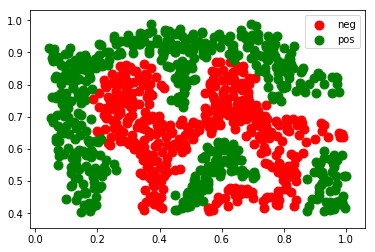

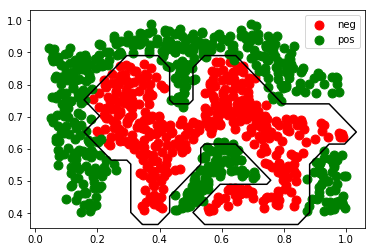

In [34]:
# load ex4data2.mat

X,y = utils.load_mat('data/ex4data2.mat')

# visualize the data

utils.plot_twoclass_data(X,y,'', '',['neg','pos'])

# convert X to kernel form with the kernel function

sigma = 0.02

# compute the kernel (slow!)

K = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X for x2 in X]).reshape(X.shape[0],X.shape[0])

# scale the kernelized data matrix

scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)

# add the intercept term

KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T

# transform y from [0,1] to [-1,1]

yy = np.ones(y.shape)
yy[y == 0] = -1

# set up the SVM and learn the parameters

svm = LinearSVM_twoclass()
svm.theta = np.zeros((KK.shape[1],))
C = 1
svm.train(KK,yy,learning_rate=1e-4,reg=C,num_iters=20000,verbose=True,batch_size=KK.shape[0])

# visualize the boundary

utils.plot_decision_kernel_boundary(X,y,scaler,sigma,svm,'','',['neg','pos'])

### Selecting hyperparameters for SVMs with Gaussian kernels
In this part of the exercise, you will gain more practical skills on how to use
a SVM with a Gaussian kernel. The next cell will load and display
a third dataset. 
In the provided dataset, **ex4data3.mat**, you are given the variables **X**,
**y**, **Xval**, **yval**.  You will be using the SVM with the Gaussian
kernel with this dataset. Your task is to use the  validation set **Xval**, **yval** to determine the
best C and $\sigma$ parameter to use. You should write any additional code necessary
to help you search over the parameters C and $\sigma$. For both C and $\sigma$, we
suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
Note that you should try all possible pairs of values for C and $\sigma$ (e.g., C = 0.3
and $\sigma$ = 0.1). For example, if you try each of the 8 values listed above for C
and for $\sigma$, you would end up training and evaluating (on the  validation
set) a total of $8^2 = 64$ different models.

When  selecting  the
best C and $\sigma$ parameter to use, you train on {\tt X,y} with a given C and $\sigma$, and then  evaluate the error of the model on the 
validation set. Recall that for classification, the error is defined as the
fraction of the  validation examples that were classified incorrectly.
You can use the **predict** method of the SVM classifier to generate the predictions for the
 validation set.
 
 After you have determined the best C and $\sigma$ parameters to use, you
should replace the assignments to **best\_C** and **best\_sigma** in the cell below. 

0.01
iteration 0 / 20000: loss 0.010000
iteration 100 / 20000: loss 0.009999
iteration 200 / 20000: loss 0.009998
iteration 300 / 20000: loss 0.009997
iteration 400 / 20000: loss 0.009996
iteration 500 / 20000: loss 0.009995
iteration 600 / 20000: loss 0.009994
iteration 700 / 20000: loss 0.009993
iteration 800 / 20000: loss 0.009991
iteration 900 / 20000: loss 0.009990
iteration 1000 / 20000: loss 0.009989
iteration 1100 / 20000: loss 0.009988
iteration 1200 / 20000: loss 0.009987
iteration 1300 / 20000: loss 0.009986
iteration 1400 / 20000: loss 0.009985
iteration 1500 / 20000: loss 0.009984
iteration 1600 / 20000: loss 0.009983
iteration 1700 / 20000: loss 0.009982
iteration 1800 / 20000: loss 0.009981
iteration 1900 / 20000: loss 0.009980
iteration 2000 / 20000: loss 0.009979
iteration 2100 / 20000: loss 0.009978
iteration 2200 / 20000: loss 0.009977
iteration 2300 / 20000: loss 0.009976
iteration 2400 / 20000: loss 0.009974
iteration 2500 / 20000: loss 0.009973
iteration 2600 / 20

iteration 1900 / 20000: loss 0.029818
iteration 2000 / 20000: loss 0.029808
iteration 2100 / 20000: loss 0.029799
iteration 2200 / 20000: loss 0.029789
iteration 2300 / 20000: loss 0.029780
iteration 2400 / 20000: loss 0.029770
iteration 2500 / 20000: loss 0.029760
iteration 2600 / 20000: loss 0.029751
iteration 2700 / 20000: loss 0.029741
iteration 2800 / 20000: loss 0.029732
iteration 2900 / 20000: loss 0.029722
iteration 3000 / 20000: loss 0.029713
iteration 3100 / 20000: loss 0.029703
iteration 3200 / 20000: loss 0.029694
iteration 3300 / 20000: loss 0.029684
iteration 3400 / 20000: loss 0.029674
iteration 3500 / 20000: loss 0.029665
iteration 3600 / 20000: loss 0.029655
iteration 3700 / 20000: loss 0.029646
iteration 3800 / 20000: loss 0.029636
iteration 3900 / 20000: loss 0.029627
iteration 4000 / 20000: loss 0.029617
iteration 4100 / 20000: loss 0.029607
iteration 4200 / 20000: loss 0.029598
iteration 4300 / 20000: loss 0.029588
iteration 4400 / 20000: loss 0.029579
iteration 45

iteration 3500 / 20000: loss 0.096276
iteration 3600 / 20000: loss 0.096170
iteration 3700 / 20000: loss 0.096063
iteration 3800 / 20000: loss 0.095957
iteration 3900 / 20000: loss 0.095851
iteration 4000 / 20000: loss 0.095745
iteration 4100 / 20000: loss 0.095639
iteration 4200 / 20000: loss 0.095532
iteration 4300 / 20000: loss 0.095426
iteration 4400 / 20000: loss 0.095320
iteration 4500 / 20000: loss 0.095214
iteration 4600 / 20000: loss 0.095108
iteration 4700 / 20000: loss 0.095002
iteration 4800 / 20000: loss 0.094896
iteration 4900 / 20000: loss 0.094790
iteration 5000 / 20000: loss 0.094684
iteration 5100 / 20000: loss 0.094577
iteration 5200 / 20000: loss 0.094471
iteration 5300 / 20000: loss 0.094365
iteration 5400 / 20000: loss 0.094259
iteration 5500 / 20000: loss 0.094153
iteration 5600 / 20000: loss 0.094047
iteration 5700 / 20000: loss 0.093941
iteration 5800 / 20000: loss 0.093835
iteration 5900 / 20000: loss 0.093729
iteration 6000 / 20000: loss 0.093623
iteration 61

iteration 5200 / 20000: loss 0.250242
iteration 5300 / 20000: loss 0.249288
iteration 5400 / 20000: loss 0.248334
iteration 5500 / 20000: loss 0.247379
iteration 5600 / 20000: loss 0.246425
iteration 5700 / 20000: loss 0.245471
iteration 5800 / 20000: loss 0.244517
iteration 5900 / 20000: loss 0.243563
iteration 6000 / 20000: loss 0.242609
iteration 6100 / 20000: loss 0.241655
iteration 6200 / 20000: loss 0.240702
iteration 6300 / 20000: loss 0.239748
iteration 6400 / 20000: loss 0.238795
iteration 6500 / 20000: loss 0.237841
iteration 6600 / 20000: loss 0.236888
iteration 6700 / 20000: loss 0.235935
iteration 6800 / 20000: loss 0.234982
iteration 6900 / 20000: loss 0.234029
iteration 7000 / 20000: loss 0.233076
iteration 7100 / 20000: loss 0.232123
iteration 7200 / 20000: loss 0.231170
iteration 7300 / 20000: loss 0.230217
iteration 7400 / 20000: loss 0.229265
iteration 7500 / 20000: loss 0.228312
iteration 7600 / 20000: loss 0.227360
iteration 7700 / 20000: loss 0.226408
iteration 78

iteration 6700 / 20000: loss 0.299673
iteration 6800 / 20000: loss 0.290120
iteration 6900 / 20000: loss 0.280569
iteration 7000 / 20000: loss 0.271018
iteration 7100 / 20000: loss 0.261468
iteration 7200 / 20000: loss 0.251919
iteration 7300 / 20000: loss 0.242449
iteration 7400 / 20000: loss 0.233029
iteration 7500 / 20000: loss 0.223685
iteration 7600 / 20000: loss 0.214347
iteration 7700 / 20000: loss 0.205019
iteration 7800 / 20000: loss 0.195730
iteration 7900 / 20000: loss 0.186442
iteration 8000 / 20000: loss 0.177155
iteration 8100 / 20000: loss 0.167869
iteration 8200 / 20000: loss 0.158583
iteration 8300 / 20000: loss 0.149299
iteration 8400 / 20000: loss 0.140015
iteration 8500 / 20000: loss 0.130733
iteration 8600 / 20000: loss 0.121549
iteration 8700 / 20000: loss 0.112425
iteration 8800 / 20000: loss 0.103360
iteration 8900 / 20000: loss 0.094347
iteration 9000 / 20000: loss 0.085348
iteration 9100 / 20000: loss 0.076426
iteration 9200 / 20000: loss 0.067580
iteration 93

iteration 8400 / 20000: loss 0.002272
iteration 8500 / 20000: loss 0.002272
iteration 8600 / 20000: loss 0.002272
iteration 8700 / 20000: loss 0.002272
iteration 8800 / 20000: loss 0.002272
iteration 8900 / 20000: loss 0.002272
iteration 9000 / 20000: loss 0.002272
iteration 9100 / 20000: loss 0.002272
iteration 9200 / 20000: loss 0.002272
iteration 9300 / 20000: loss 0.002272
iteration 9400 / 20000: loss 0.002272
iteration 9500 / 20000: loss 0.002272
iteration 9600 / 20000: loss 0.002272
iteration 9700 / 20000: loss 0.002272
iteration 9800 / 20000: loss 0.002272
iteration 9900 / 20000: loss 0.002272
iteration 10000 / 20000: loss 0.002272
iteration 10100 / 20000: loss 0.002272
iteration 10200 / 20000: loss 0.002272
iteration 10300 / 20000: loss 0.002272
iteration 10400 / 20000: loss 0.002272
iteration 10500 / 20000: loss 0.002272
iteration 10600 / 20000: loss 0.002272
iteration 10700 / 20000: loss 0.002272
iteration 10800 / 20000: loss 0.002272
iteration 10900 / 20000: loss 0.002272
it

iteration 9900 / 20000: loss 0.002273
iteration 10000 / 20000: loss 0.002273
iteration 10100 / 20000: loss 0.002273
iteration 10200 / 20000: loss 0.002272
iteration 10300 / 20000: loss 0.002272
iteration 10400 / 20000: loss 0.002273
iteration 10500 / 20000: loss 0.002273
iteration 10600 / 20000: loss 0.002273
iteration 10700 / 20000: loss 0.002274
iteration 10800 / 20000: loss 0.002274
iteration 10900 / 20000: loss 0.002274
iteration 11000 / 20000: loss 0.002274
iteration 11100 / 20000: loss 0.002274
iteration 11200 / 20000: loss 0.002274
iteration 11300 / 20000: loss 0.002274
iteration 11400 / 20000: loss 0.002273
iteration 11500 / 20000: loss 0.002273
iteration 11600 / 20000: loss 0.002273
iteration 11700 / 20000: loss 0.002273
iteration 11800 / 20000: loss 0.002273
iteration 11900 / 20000: loss 0.002273
iteration 12000 / 20000: loss 0.002273
iteration 12100 / 20000: loss 0.002273
iteration 12200 / 20000: loss 0.002273
iteration 12300 / 20000: loss 0.002272
iteration 12400 / 20000: l

iteration 11500 / 20000: loss 0.002278
iteration 11600 / 20000: loss 0.002277
iteration 11700 / 20000: loss 0.002277
iteration 11800 / 20000: loss 0.002277
iteration 11900 / 20000: loss 0.002277
iteration 12000 / 20000: loss 0.002277
iteration 12100 / 20000: loss 0.002279
iteration 12200 / 20000: loss 0.002280
iteration 12300 / 20000: loss 0.002280
iteration 12400 / 20000: loss 0.002280
iteration 12500 / 20000: loss 0.002280
iteration 12600 / 20000: loss 0.002280
iteration 12700 / 20000: loss 0.002280
iteration 12800 / 20000: loss 0.002280
iteration 12900 / 20000: loss 0.002280
iteration 13000 / 20000: loss 0.002280
iteration 13100 / 20000: loss 0.002279
iteration 13200 / 20000: loss 0.002279
iteration 13300 / 20000: loss 0.002279
iteration 13400 / 20000: loss 0.002279
iteration 13500 / 20000: loss 0.002279
iteration 13600 / 20000: loss 0.002279
iteration 13700 / 20000: loss 0.002279
iteration 13800 / 20000: loss 0.002278
iteration 13900 / 20000: loss 0.002278
iteration 14000 / 20000: 

iteration 12800 / 20000: loss 0.009713
iteration 12900 / 20000: loss 0.009711
iteration 13000 / 20000: loss 0.009709
iteration 13100 / 20000: loss 0.009706
iteration 13200 / 20000: loss 0.009704
iteration 13300 / 20000: loss 0.009702
iteration 13400 / 20000: loss 0.009700
iteration 13500 / 20000: loss 0.009698
iteration 13600 / 20000: loss 0.009695
iteration 13700 / 20000: loss 0.009693
iteration 13800 / 20000: loss 0.009691
iteration 13900 / 20000: loss 0.009689
iteration 14000 / 20000: loss 0.009686
iteration 14100 / 20000: loss 0.009684
iteration 14200 / 20000: loss 0.009682
iteration 14300 / 20000: loss 0.009680
iteration 14400 / 20000: loss 0.009678
iteration 14500 / 20000: loss 0.009675
iteration 14600 / 20000: loss 0.009673
iteration 14700 / 20000: loss 0.009671
iteration 14800 / 20000: loss 0.009669
iteration 14900 / 20000: loss 0.009666
iteration 15000 / 20000: loss 0.009664
iteration 15100 / 20000: loss 0.009662
iteration 15200 / 20000: loss 0.009660
iteration 15300 / 20000: 

iteration 14700 / 20000: loss 0.027038
iteration 14800 / 20000: loss 0.027018
iteration 14900 / 20000: loss 0.026998
iteration 15000 / 20000: loss 0.026978
iteration 15100 / 20000: loss 0.026958
iteration 15200 / 20000: loss 0.026938
iteration 15300 / 20000: loss 0.026918
iteration 15400 / 20000: loss 0.026898
iteration 15500 / 20000: loss 0.026878
iteration 15600 / 20000: loss 0.026858
iteration 15700 / 20000: loss 0.026838
iteration 15800 / 20000: loss 0.026818
iteration 15900 / 20000: loss 0.026798
iteration 16000 / 20000: loss 0.026778
iteration 16100 / 20000: loss 0.026758
iteration 16200 / 20000: loss 0.026738
iteration 16300 / 20000: loss 0.026718
iteration 16400 / 20000: loss 0.026698
iteration 16500 / 20000: loss 0.026678
iteration 16600 / 20000: loss 0.026658
iteration 16700 / 20000: loss 0.026638
iteration 16800 / 20000: loss 0.026618
iteration 16900 / 20000: loss 0.026598
iteration 17000 / 20000: loss 0.026578
iteration 17100 / 20000: loss 0.026558
iteration 17200 / 20000: 

iteration 16400 / 20000: loss 0.063360
iteration 16500 / 20000: loss 0.063144
iteration 16600 / 20000: loss 0.062927
iteration 16700 / 20000: loss 0.062711
iteration 16800 / 20000: loss 0.062497
iteration 16900 / 20000: loss 0.062285
iteration 17000 / 20000: loss 0.062073
iteration 17100 / 20000: loss 0.061861
iteration 17200 / 20000: loss 0.061652
iteration 17300 / 20000: loss 0.061443
iteration 17400 / 20000: loss 0.061235
iteration 17500 / 20000: loss 0.061026
iteration 17600 / 20000: loss 0.060817
iteration 17700 / 20000: loss 0.060609
iteration 17800 / 20000: loss 0.060400
iteration 17900 / 20000: loss 0.060192
iteration 18000 / 20000: loss 0.059983
iteration 18100 / 20000: loss 0.059775
iteration 18200 / 20000: loss 0.059566
iteration 18300 / 20000: loss 0.059358
iteration 18400 / 20000: loss 0.059149
iteration 18500 / 20000: loss 0.058941
iteration 18600 / 20000: loss 0.058732
iteration 18700 / 20000: loss 0.058524
iteration 18800 / 20000: loss 0.058315
iteration 18900 / 20000: 

iteration 18000 / 20000: loss 0.045931
iteration 18100 / 20000: loss 0.045523
iteration 18200 / 20000: loss 0.045127
iteration 18300 / 20000: loss 0.044743
iteration 18400 / 20000: loss 0.044366
iteration 18500 / 20000: loss 0.043997
iteration 18600 / 20000: loss 0.043631
iteration 18700 / 20000: loss 0.043278
iteration 18800 / 20000: loss 0.042936
iteration 18900 / 20000: loss 0.042606
iteration 19000 / 20000: loss 0.042288
iteration 19100 / 20000: loss 0.041973
iteration 19200 / 20000: loss 0.041660
iteration 19300 / 20000: loss 0.041354
iteration 19400 / 20000: loss 0.041055
iteration 19500 / 20000: loss 0.040760
iteration 19600 / 20000: loss 0.040471
iteration 19700 / 20000: loss 0.040190
iteration 19800 / 20000: loss 0.039916
iteration 19900 / 20000: loss 0.039643
iteration 0 / 20000: loss 1.000000
iteration 100 / 20000: loss 0.977455
iteration 200 / 20000: loss 0.954913
iteration 300 / 20000: loss 0.932373
iteration 400 / 20000: loss 0.909834
iteration 500 / 20000: loss 0.887298


iteration 19800 / 20000: loss 0.037644
iteration 19900 / 20000: loss 0.037484
iteration 0 / 20000: loss 3.000000
iteration 100 / 20000: loss 2.797098
iteration 200 / 20000: loss 2.594216
iteration 300 / 20000: loss 2.391353
iteration 400 / 20000: loss 2.188509
iteration 500 / 20000: loss 1.985684
iteration 600 / 20000: loss 1.789815
iteration 700 / 20000: loss 1.602734
iteration 800 / 20000: loss 1.424843
iteration 900 / 20000: loss 1.264788
iteration 1000 / 20000: loss 1.117666
iteration 1100 / 20000: loss 0.985116
iteration 1200 / 20000: loss 0.869964
iteration 1300 / 20000: loss 0.769002
iteration 1400 / 20000: loss 0.685869
iteration 1500 / 20000: loss 0.613694
iteration 1600 / 20000: loss 0.549765
iteration 1700 / 20000: loss 0.494482
iteration 1800 / 20000: loss 0.447768
iteration 1900 / 20000: loss 0.411375
iteration 2000 / 20000: loss 0.382069
iteration 2100 / 20000: loss 0.355633
iteration 2200 / 20000: loss 0.332185
iteration 2300 / 20000: loss 0.311295
iteration 2400 / 20000

iteration 1400 / 20000: loss 0.506355
iteration 1500 / 20000: loss 0.474134
iteration 1600 / 20000: loss 0.444562
iteration 1700 / 20000: loss 0.417819
iteration 1800 / 20000: loss 0.394184
iteration 1900 / 20000: loss 0.375175
iteration 2000 / 20000: loss 0.357674
iteration 2100 / 20000: loss 0.341404
iteration 2200 / 20000: loss 0.330510
iteration 2300 / 20000: loss 0.321128
iteration 2400 / 20000: loss 0.311924
iteration 2500 / 20000: loss 0.302770
iteration 2600 / 20000: loss 0.293681
iteration 2700 / 20000: loss 0.284681
iteration 2800 / 20000: loss 0.275705
iteration 2900 / 20000: loss 0.266743
iteration 3000 / 20000: loss 0.257735
iteration 3100 / 20000: loss 0.248757
iteration 3200 / 20000: loss 0.239797
iteration 3300 / 20000: loss 0.230815
iteration 3400 / 20000: loss 0.222106
iteration 3500 / 20000: loss 0.213392
iteration 3600 / 20000: loss 0.204653
iteration 3700 / 20000: loss 0.196960
iteration 3800 / 20000: loss 0.190128
iteration 3900 / 20000: loss 0.183310
iteration 40

iteration 3500 / 20000: loss 0.150139
iteration 3600 / 20000: loss 0.144890
iteration 3700 / 20000: loss 0.139685
iteration 3800 / 20000: loss 0.134431
iteration 3900 / 20000: loss 0.129226
iteration 4000 / 20000: loss 0.124011
iteration 4100 / 20000: loss 0.118746
iteration 4200 / 20000: loss 0.113555
iteration 4300 / 20000: loss 0.108308
iteration 4400 / 20000: loss 0.103141
iteration 4500 / 20000: loss 0.097856
iteration 4600 / 20000: loss 0.092644
iteration 4700 / 20000: loss 0.087444
iteration 4800 / 20000: loss 0.082189
iteration 4900 / 20000: loss 0.076994
iteration 5000 / 20000: loss 0.071775
iteration 5100 / 20000: loss 0.066541
iteration 5200 / 20000: loss 0.061298
iteration 5300 / 20000: loss 0.056113
iteration 5400 / 20000: loss 0.050893
iteration 5500 / 20000: loss 0.045643
iteration 5600 / 20000: loss 0.040432
iteration 5700 / 20000: loss 0.035188
iteration 5800 / 20000: loss 0.029979
iteration 5900 / 20000: loss 0.024752
iteration 6000 / 20000: loss 0.019720
iteration 61

iteration 5400 / 20000: loss 0.009132
iteration 5500 / 20000: loss 0.009116
iteration 5600 / 20000: loss 0.009099
iteration 5700 / 20000: loss 0.009083
iteration 5800 / 20000: loss 0.009067
iteration 5900 / 20000: loss 0.009051
iteration 6000 / 20000: loss 0.009035
iteration 6100 / 20000: loss 0.009019
iteration 6200 / 20000: loss 0.009003
iteration 6300 / 20000: loss 0.008987
iteration 6400 / 20000: loss 0.008971
iteration 6500 / 20000: loss 0.008955
iteration 6600 / 20000: loss 0.008939
iteration 6700 / 20000: loss 0.008923
iteration 6800 / 20000: loss 0.008907
iteration 6900 / 20000: loss 0.008891
iteration 7000 / 20000: loss 0.008875
iteration 7100 / 20000: loss 0.008859
iteration 7200 / 20000: loss 0.008843
iteration 7300 / 20000: loss 0.008827
iteration 7400 / 20000: loss 0.008811
iteration 7500 / 20000: loss 0.008795
iteration 7600 / 20000: loss 0.008779
iteration 7700 / 20000: loss 0.008763
iteration 7800 / 20000: loss 0.008747
iteration 7900 / 20000: loss 0.008731
iteration 80

iteration 7200 / 20000: loss 0.019587
iteration 7300 / 20000: loss 0.019443
iteration 7400 / 20000: loss 0.019299
iteration 7500 / 20000: loss 0.019155
iteration 7600 / 20000: loss 0.019011
iteration 7700 / 20000: loss 0.018867
iteration 7800 / 20000: loss 0.018723
iteration 7900 / 20000: loss 0.018579
iteration 8000 / 20000: loss 0.018435
iteration 8100 / 20000: loss 0.018291
iteration 8200 / 20000: loss 0.018147
iteration 8300 / 20000: loss 0.018003
iteration 8400 / 20000: loss 0.017859
iteration 8500 / 20000: loss 0.017715
iteration 8600 / 20000: loss 0.017571
iteration 8700 / 20000: loss 0.017427
iteration 8800 / 20000: loss 0.017283
iteration 8900 / 20000: loss 0.017139
iteration 9000 / 20000: loss 0.016995
iteration 9100 / 20000: loss 0.016852
iteration 9200 / 20000: loss 0.016708
iteration 9300 / 20000: loss 0.016564
iteration 9400 / 20000: loss 0.016420
iteration 9500 / 20000: loss 0.016279
iteration 9600 / 20000: loss 0.016138
iteration 9700 / 20000: loss 0.016005
iteration 98

iteration 8900 / 20000: loss 0.027941
iteration 9000 / 20000: loss 0.027834
iteration 9100 / 20000: loss 0.027734
iteration 9200 / 20000: loss 0.027638
iteration 9300 / 20000: loss 0.027550
iteration 9400 / 20000: loss 0.027462
iteration 9500 / 20000: loss 0.027375
iteration 9600 / 20000: loss 0.027287
iteration 9700 / 20000: loss 0.027200
iteration 9800 / 20000: loss 0.027115
iteration 9900 / 20000: loss 0.027029
iteration 10000 / 20000: loss 0.026944
iteration 10100 / 20000: loss 0.026858
iteration 10200 / 20000: loss 0.026773
iteration 10300 / 20000: loss 0.026687
iteration 10400 / 20000: loss 0.026602
iteration 10500 / 20000: loss 0.026520
iteration 10600 / 20000: loss 0.026444
iteration 10700 / 20000: loss 0.026375
iteration 10800 / 20000: loss 0.026307
iteration 10900 / 20000: loss 0.026238
iteration 11000 / 20000: loss 0.026170
iteration 11100 / 20000: loss 0.026102
iteration 11200 / 20000: loss 0.026036
iteration 11300 / 20000: loss 0.025971
iteration 11400 / 20000: loss 0.0259

iteration 10700 / 20000: loss 0.060517
iteration 10800 / 20000: loss 0.060400
iteration 10900 / 20000: loss 0.060292
iteration 11000 / 20000: loss 0.060191
iteration 11100 / 20000: loss 0.060090
iteration 11200 / 20000: loss 0.059988
iteration 11300 / 20000: loss 0.059887
iteration 11400 / 20000: loss 0.059786
iteration 11500 / 20000: loss 0.059685
iteration 11600 / 20000: loss 0.059589
iteration 11700 / 20000: loss 0.059497
iteration 11800 / 20000: loss 0.059414
iteration 11900 / 20000: loss 0.059352
iteration 12000 / 20000: loss 0.059292
iteration 12100 / 20000: loss 0.059232
iteration 12200 / 20000: loss 0.059172
iteration 12300 / 20000: loss 0.059112
iteration 12400 / 20000: loss 0.059052
iteration 12500 / 20000: loss 0.058992
iteration 12600 / 20000: loss 0.058932
iteration 12700 / 20000: loss 0.058872
iteration 12800 / 20000: loss 0.058812
iteration 12900 / 20000: loss 0.058752
iteration 13000 / 20000: loss 0.058692
iteration 13100 / 20000: loss 0.058632
iteration 13200 / 20000: 

iteration 12200 / 20000: loss 0.172191
iteration 12300 / 20000: loss 0.172031
iteration 12400 / 20000: loss 0.171917
iteration 12500 / 20000: loss 0.171803
iteration 12600 / 20000: loss 0.171690
iteration 12700 / 20000: loss 0.171576
iteration 12800 / 20000: loss 0.171462
iteration 12900 / 20000: loss 0.171353
iteration 13000 / 20000: loss 0.171245
iteration 13100 / 20000: loss 0.171137
iteration 13200 / 20000: loss 0.171028
iteration 13300 / 20000: loss 0.170920
iteration 13400 / 20000: loss 0.170811
iteration 13500 / 20000: loss 0.170703
iteration 13600 / 20000: loss 0.170595
iteration 13700 / 20000: loss 0.170487
iteration 13800 / 20000: loss 0.170379
iteration 13900 / 20000: loss 0.170271
iteration 14000 / 20000: loss 0.170164
iteration 14100 / 20000: loss 0.170057
iteration 14200 / 20000: loss 0.169956
iteration 14300 / 20000: loss 0.169856
iteration 14400 / 20000: loss 0.169755
iteration 14500 / 20000: loss 0.169655
iteration 14600 / 20000: loss 0.169555
iteration 14700 / 20000: 

iteration 13700 / 20000: loss 0.471895
iteration 13800 / 20000: loss 0.471635
iteration 13900 / 20000: loss 0.471373
iteration 14000 / 20000: loss 0.471110
iteration 14100 / 20000: loss 0.470847
iteration 14200 / 20000: loss 0.470585
iteration 14300 / 20000: loss 0.470326
iteration 14400 / 20000: loss 0.470075
iteration 14500 / 20000: loss 0.469834
iteration 14600 / 20000: loss 0.469590
iteration 14700 / 20000: loss 0.469351
iteration 14800 / 20000: loss 0.469152
iteration 14900 / 20000: loss 0.468958
iteration 15000 / 20000: loss 0.468762
iteration 15100 / 20000: loss 0.468567
iteration 15200 / 20000: loss 0.468375
iteration 15300 / 20000: loss 0.468177
iteration 15400 / 20000: loss 0.467984
iteration 15500 / 20000: loss 0.467790
iteration 15600 / 20000: loss 0.467592
iteration 15700 / 20000: loss 0.467398
iteration 15800 / 20000: loss 0.467203
iteration 15900 / 20000: loss 0.467010
iteration 16000 / 20000: loss 0.466820
iteration 16100 / 20000: loss 0.466618
iteration 16200 / 20000: 

iteration 15000 / 20000: loss 1.404850
iteration 15100 / 20000: loss 1.404113
iteration 15200 / 20000: loss 1.403364
iteration 15300 / 20000: loss 1.402695
iteration 15400 / 20000: loss 1.402088
iteration 15500 / 20000: loss 1.401513
iteration 15600 / 20000: loss 1.400689
iteration 15700 / 20000: loss 1.399889
iteration 15800 / 20000: loss 1.399185
iteration 15900 / 20000: loss 1.398550
iteration 16000 / 20000: loss 1.397807
iteration 16100 / 20000: loss 1.397155
iteration 16200 / 20000: loss 1.396439
iteration 16300 / 20000: loss 1.395760
iteration 16400 / 20000: loss 1.395161
iteration 16500 / 20000: loss 1.394351
iteration 16600 / 20000: loss 1.393731
iteration 16700 / 20000: loss 1.393037
iteration 16800 / 20000: loss 1.392317
iteration 16900 / 20000: loss 1.391601
iteration 17000 / 20000: loss 1.390937
iteration 17100 / 20000: loss 1.390323
iteration 17200 / 20000: loss 1.389601
iteration 17300 / 20000: loss 1.388905
iteration 17400 / 20000: loss 1.388282
iteration 17500 / 20000: 

iteration 16500 / 20000: loss 3.628740
iteration 16600 / 20000: loss 3.625248
iteration 16700 / 20000: loss 3.621164
iteration 16800 / 20000: loss 3.616955
iteration 16900 / 20000: loss 3.613975
iteration 17000 / 20000: loss 3.609937
iteration 17100 / 20000: loss 3.607119
iteration 17200 / 20000: loss 3.602287
iteration 17300 / 20000: loss 3.599293
iteration 17400 / 20000: loss 3.595330
iteration 17500 / 20000: loss 3.591618
iteration 17600 / 20000: loss 3.587679
iteration 17700 / 20000: loss 3.584312
iteration 17800 / 20000: loss 3.580348
iteration 17900 / 20000: loss 3.578630
iteration 18000 / 20000: loss 3.573802
iteration 18100 / 20000: loss 3.571337
iteration 18200 / 20000: loss 3.567940
iteration 18300 / 20000: loss 3.565511
iteration 18400 / 20000: loss 3.562099
iteration 18500 / 20000: loss 3.560210
iteration 18600 / 20000: loss 3.557004
iteration 18700 / 20000: loss 3.553771
iteration 18800 / 20000: loss 3.552158
iteration 18900 / 20000: loss 3.549077
iteration 19000 / 20000: 

iteration 18300 / 20000: loss 0.004088
iteration 18400 / 20000: loss 0.004083
iteration 18500 / 20000: loss 0.004079
iteration 18600 / 20000: loss 0.004074
iteration 18700 / 20000: loss 0.004070
iteration 18800 / 20000: loss 0.004065
iteration 18900 / 20000: loss 0.004061
iteration 19000 / 20000: loss 0.004056
iteration 19100 / 20000: loss 0.004052
iteration 19200 / 20000: loss 0.004048
iteration 19300 / 20000: loss 0.004043
iteration 19400 / 20000: loss 0.004039
iteration 19500 / 20000: loss 0.004035
iteration 19600 / 20000: loss 0.004031
iteration 19700 / 20000: loss 0.004027
iteration 19800 / 20000: loss 0.004023
iteration 19900 / 20000: loss 0.004019
iteration 0 / 20000: loss 0.030000
iteration 100 / 20000: loss 0.029575
iteration 200 / 20000: loss 0.029150
iteration 300 / 20000: loss 0.028726
iteration 400 / 20000: loss 0.028301
iteration 500 / 20000: loss 0.027876
iteration 600 / 20000: loss 0.027452
iteration 700 / 20000: loss 0.027027
iteration 800 / 20000: loss 0.026603
iterat

iteration 19700 / 20000: loss 0.009902
iteration 19800 / 20000: loss 0.009895
iteration 19900 / 20000: loss 0.009888
iteration 0 / 20000: loss 0.100000
iteration 100 / 20000: loss 0.095280
iteration 200 / 20000: loss 0.090560
iteration 300 / 20000: loss 0.085841
iteration 400 / 20000: loss 0.081122
iteration 500 / 20000: loss 0.076403
iteration 600 / 20000: loss 0.071685
iteration 700 / 20000: loss 0.066968
iteration 800 / 20000: loss 0.062250
iteration 900 / 20000: loss 0.057534
iteration 1000 / 20000: loss 0.052826
iteration 1100 / 20000: loss 0.048997
iteration 1200 / 20000: loss 0.046613
iteration 1300 / 20000: loss 0.044971
iteration 1400 / 20000: loss 0.043754
iteration 1500 / 20000: loss 0.042799
iteration 1600 / 20000: loss 0.041972
iteration 1700 / 20000: loss 0.041316
iteration 1800 / 20000: loss 0.040768
iteration 1900 / 20000: loss 0.040300
iteration 2000 / 20000: loss 0.039880
iteration 2100 / 20000: loss 0.039468
iteration 2200 / 20000: loss 0.039082
iteration 2300 / 2000

iteration 1300 / 20000: loss 0.104859
iteration 1400 / 20000: loss 0.103572
iteration 1500 / 20000: loss 0.102478
iteration 1600 / 20000: loss 0.101454
iteration 1700 / 20000: loss 0.100573
iteration 1800 / 20000: loss 0.099736
iteration 1900 / 20000: loss 0.098974
iteration 2000 / 20000: loss 0.098225
iteration 2100 / 20000: loss 0.097475
iteration 2200 / 20000: loss 0.096776
iteration 2300 / 20000: loss 0.096124
iteration 2400 / 20000: loss 0.095478
iteration 2500 / 20000: loss 0.094837
iteration 2600 / 20000: loss 0.094221
iteration 2700 / 20000: loss 0.093622
iteration 2800 / 20000: loss 0.093024
iteration 2900 / 20000: loss 0.092462
iteration 3000 / 20000: loss 0.091925
iteration 3100 / 20000: loss 0.091428
iteration 3200 / 20000: loss 0.090970
iteration 3300 / 20000: loss 0.090518
iteration 3400 / 20000: loss 0.090067
iteration 3500 / 20000: loss 0.089616
iteration 3600 / 20000: loss 0.089189
iteration 3700 / 20000: loss 0.088775
iteration 3800 / 20000: loss 0.088377
iteration 39

iteration 3300 / 20000: loss 0.259798
iteration 3400 / 20000: loss 0.259161
iteration 3500 / 20000: loss 0.258524
iteration 3600 / 20000: loss 0.257887
iteration 3700 / 20000: loss 0.257253
iteration 3800 / 20000: loss 0.256629
iteration 3900 / 20000: loss 0.256105
iteration 4000 / 20000: loss 0.255617
iteration 4100 / 20000: loss 0.255129
iteration 4200 / 20000: loss 0.254641
iteration 4300 / 20000: loss 0.254255
iteration 4400 / 20000: loss 0.253882
iteration 4500 / 20000: loss 0.253509
iteration 4600 / 20000: loss 0.253136
iteration 4700 / 20000: loss 0.252802
iteration 4800 / 20000: loss 0.252492
iteration 4900 / 20000: loss 0.252184
iteration 5000 / 20000: loss 0.251876
iteration 5100 / 20000: loss 0.251568
iteration 5200 / 20000: loss 0.251260
iteration 5300 / 20000: loss 0.251008
iteration 5400 / 20000: loss 0.250793
iteration 5500 / 20000: loss 0.250579
iteration 5600 / 20000: loss 0.250365
iteration 5700 / 20000: loss 0.250151
iteration 5800 / 20000: loss 0.249937
iteration 59

iteration 4900 / 20000: loss 0.713328
iteration 5000 / 20000: loss 0.712390
iteration 5100 / 20000: loss 0.711453
iteration 5200 / 20000: loss 0.710516
iteration 5300 / 20000: loss 0.709579
iteration 5400 / 20000: loss 0.708642
iteration 5500 / 20000: loss 0.707705
iteration 5600 / 20000: loss 0.706769
iteration 5700 / 20000: loss 0.705833
iteration 5800 / 20000: loss 0.704896
iteration 5900 / 20000: loss 0.703960
iteration 6000 / 20000: loss 0.703022
iteration 6100 / 20000: loss 0.702086
iteration 6200 / 20000: loss 0.701150
iteration 6300 / 20000: loss 0.700213
iteration 6400 / 20000: loss 0.699278
iteration 6500 / 20000: loss 0.698342
iteration 6600 / 20000: loss 0.697406
iteration 6700 / 20000: loss 0.696471
iteration 6800 / 20000: loss 0.695535
iteration 6900 / 20000: loss 0.694620
iteration 7000 / 20000: loss 0.693715
iteration 7100 / 20000: loss 0.692909
iteration 7200 / 20000: loss 0.692188
iteration 7300 / 20000: loss 0.691566
iteration 7400 / 20000: loss 0.690943
iteration 75

iteration 6800 / 20000: loss 2.139291
iteration 6900 / 20000: loss 2.136742
iteration 7000 / 20000: loss 2.134260
iteration 7100 / 20000: loss 2.131779
iteration 7200 / 20000: loss 2.129282
iteration 7300 / 20000: loss 2.126795
iteration 7400 / 20000: loss 2.124382
iteration 7500 / 20000: loss 2.122014
iteration 7600 / 20000: loss 2.119671
iteration 7700 / 20000: loss 2.117320
iteration 7800 / 20000: loss 2.114973
iteration 7900 / 20000: loss 2.112626
iteration 8000 / 20000: loss 2.110270
iteration 8100 / 20000: loss 2.107945
iteration 8200 / 20000: loss 2.105616
iteration 8300 / 20000: loss 2.103314
iteration 8400 / 20000: loss 2.101009
iteration 8500 / 20000: loss 2.098717
iteration 8600 / 20000: loss 2.096493
iteration 8700 / 20000: loss 2.094365
iteration 8800 / 20000: loss 2.092239
iteration 8900 / 20000: loss 2.090103
iteration 9000 / 20000: loss 2.088007
iteration 9100 / 20000: loss 2.085914
iteration 9200 / 20000: loss 2.083814
iteration 9300 / 20000: loss 2.081768
iteration 94

iteration 8600 / 20000: loss 5.757251
iteration 8700 / 20000: loss 5.754902
iteration 8800 / 20000: loss 5.752513
iteration 8900 / 20000: loss 5.750741
iteration 9000 / 20000: loss 5.748478
iteration 9100 / 20000: loss 5.745755
iteration 9200 / 20000: loss 5.743500
iteration 9300 / 20000: loss 5.741361
iteration 9400 / 20000: loss 5.739135
iteration 9500 / 20000: loss 5.737110
iteration 9600 / 20000: loss 5.735295
iteration 9700 / 20000: loss 5.733139
iteration 9800 / 20000: loss 5.730592
iteration 9900 / 20000: loss 5.728328
iteration 10000 / 20000: loss 5.726197
iteration 10100 / 20000: loss 5.724397
iteration 10200 / 20000: loss 5.722267
iteration 10300 / 20000: loss 5.719605
iteration 10400 / 20000: loss 5.717496
iteration 10500 / 20000: loss 5.715425
iteration 10600 / 20000: loss 5.713428
iteration 10700 / 20000: loss 5.711525
iteration 10800 / 20000: loss 5.708741
iteration 10900 / 20000: loss 5.706740
iteration 11000 / 20000: loss 5.704576
iteration 11100 / 20000: loss 5.702466


iteration 10400 / 20000: loss 0.005452
iteration 10500 / 20000: loss 0.005430
iteration 10600 / 20000: loss 0.005407
iteration 10700 / 20000: loss 0.005386
iteration 10800 / 20000: loss 0.005364
iteration 10900 / 20000: loss 0.005344
iteration 11000 / 20000: loss 0.005325
iteration 11100 / 20000: loss 0.005306
iteration 11200 / 20000: loss 0.005289
iteration 11300 / 20000: loss 0.005272
iteration 11400 / 20000: loss 0.005255
iteration 11500 / 20000: loss 0.005240
iteration 11600 / 20000: loss 0.005225
iteration 11700 / 20000: loss 0.005210
iteration 11800 / 20000: loss 0.005194
iteration 11900 / 20000: loss 0.005180
iteration 12000 / 20000: loss 0.005166
iteration 12100 / 20000: loss 0.005152
iteration 12200 / 20000: loss 0.005139
iteration 12300 / 20000: loss 0.005127
iteration 12400 / 20000: loss 0.005115
iteration 12500 / 20000: loss 0.005103
iteration 12600 / 20000: loss 0.005091
iteration 12700 / 20000: loss 0.005079
iteration 12800 / 20000: loss 0.005067
iteration 12900 / 20000: 

iteration 12000 / 20000: loss 0.011950
iteration 12100 / 20000: loss 0.011930
iteration 12200 / 20000: loss 0.011909
iteration 12300 / 20000: loss 0.011889
iteration 12400 / 20000: loss 0.011869
iteration 12500 / 20000: loss 0.011849
iteration 12600 / 20000: loss 0.011829
iteration 12700 / 20000: loss 0.011809
iteration 12800 / 20000: loss 0.011789
iteration 12900 / 20000: loss 0.011770
iteration 13000 / 20000: loss 0.011750
iteration 13100 / 20000: loss 0.011730
iteration 13200 / 20000: loss 0.011710
iteration 13300 / 20000: loss 0.011691
iteration 13400 / 20000: loss 0.011673
iteration 13500 / 20000: loss 0.011655
iteration 13600 / 20000: loss 0.011637
iteration 13700 / 20000: loss 0.011620
iteration 13800 / 20000: loss 0.011604
iteration 13900 / 20000: loss 0.011587
iteration 14000 / 20000: loss 0.011570
iteration 14100 / 20000: loss 0.011553
iteration 14200 / 20000: loss 0.011537
iteration 14300 / 20000: loss 0.011522
iteration 14400 / 20000: loss 0.011507
iteration 14500 / 20000: 

iteration 13500 / 20000: loss 0.030513
iteration 13600 / 20000: loss 0.030472
iteration 13700 / 20000: loss 0.030430
iteration 13800 / 20000: loss 0.030389
iteration 13900 / 20000: loss 0.030347
iteration 14000 / 20000: loss 0.030307
iteration 14100 / 20000: loss 0.030267
iteration 14200 / 20000: loss 0.030227
iteration 14300 / 20000: loss 0.030187
iteration 14400 / 20000: loss 0.030147
iteration 14500 / 20000: loss 0.030107
iteration 14600 / 20000: loss 0.030067
iteration 14700 / 20000: loss 0.030027
iteration 14800 / 20000: loss 0.029987
iteration 14900 / 20000: loss 0.029947
iteration 15000 / 20000: loss 0.029908
iteration 15100 / 20000: loss 0.029868
iteration 15200 / 20000: loss 0.029828
iteration 15300 / 20000: loss 0.029788
iteration 15400 / 20000: loss 0.029748
iteration 15500 / 20000: loss 0.029708
iteration 15600 / 20000: loss 0.029668
iteration 15700 / 20000: loss 0.029628
iteration 15800 / 20000: loss 0.029588
iteration 15900 / 20000: loss 0.029548
iteration 16000 / 20000: 

iteration 15300 / 20000: loss 0.075317
iteration 15400 / 20000: loss 0.075291
iteration 15500 / 20000: loss 0.075264
iteration 15600 / 20000: loss 0.075237
iteration 15700 / 20000: loss 0.075211
iteration 15800 / 20000: loss 0.075184
iteration 15900 / 20000: loss 0.075158
iteration 16000 / 20000: loss 0.075131
iteration 16100 / 20000: loss 0.075104
iteration 16200 / 20000: loss 0.075078
iteration 16300 / 20000: loss 0.075051
iteration 16400 / 20000: loss 0.075025
iteration 16500 / 20000: loss 0.074998
iteration 16600 / 20000: loss 0.074971
iteration 16700 / 20000: loss 0.074945
iteration 16800 / 20000: loss 0.074918
iteration 16900 / 20000: loss 0.074892
iteration 17000 / 20000: loss 0.074865
iteration 17100 / 20000: loss 0.074838
iteration 17200 / 20000: loss 0.074812
iteration 17300 / 20000: loss 0.074785
iteration 17400 / 20000: loss 0.074759
iteration 17500 / 20000: loss 0.074732
iteration 17600 / 20000: loss 0.074706
iteration 17700 / 20000: loss 0.074679
iteration 17800 / 20000: 

iteration 16700 / 20000: loss 0.236847
iteration 16800 / 20000: loss 0.236811
iteration 16900 / 20000: loss 0.236774
iteration 17000 / 20000: loss 0.236737
iteration 17100 / 20000: loss 0.236700
iteration 17200 / 20000: loss 0.236663
iteration 17300 / 20000: loss 0.236626
iteration 17400 / 20000: loss 0.236589
iteration 17500 / 20000: loss 0.236552
iteration 17600 / 20000: loss 0.236515
iteration 17700 / 20000: loss 0.236478
iteration 17800 / 20000: loss 0.236441
iteration 17900 / 20000: loss 0.236405
iteration 18000 / 20000: loss 0.236368
iteration 18100 / 20000: loss 0.236331
iteration 18200 / 20000: loss 0.236294
iteration 18300 / 20000: loss 0.236257
iteration 18400 / 20000: loss 0.236220
iteration 18500 / 20000: loss 0.236183
iteration 18600 / 20000: loss 0.236146
iteration 18700 / 20000: loss 0.236109
iteration 18800 / 20000: loss 0.236073
iteration 18900 / 20000: loss 0.236042
iteration 19000 / 20000: loss 0.236012
iteration 19100 / 20000: loss 0.235983
iteration 19200 / 20000: 

iteration 18600 / 20000: loss 0.699016
iteration 18700 / 20000: loss 0.699004
iteration 18800 / 20000: loss 0.698994
iteration 18900 / 20000: loss 0.698981
iteration 19000 / 20000: loss 0.698968
iteration 19100 / 20000: loss 0.698956
iteration 19200 / 20000: loss 0.698945
iteration 19300 / 20000: loss 0.698932
iteration 19400 / 20000: loss 0.698921
iteration 19500 / 20000: loss 0.698906
iteration 19600 / 20000: loss 0.698895
iteration 19700 / 20000: loss 0.698884
iteration 19800 / 20000: loss 0.698871
iteration 19900 / 20000: loss 0.698861
iteration 0 / 20000: loss 10.000000
iteration 100 / 20000: loss 3.218598
iteration 200 / 20000: loss 2.785456
iteration 300 / 20000: loss 2.583831
iteration 400 / 20000: loss 2.521038
iteration 500 / 20000: loss 2.487934
iteration 600 / 20000: loss 2.461650
iteration 700 / 20000: loss 2.443179
iteration 800 / 20000: loss 2.427819
iteration 900 / 20000: loss 2.414820
iteration 1000 / 20000: loss 2.401946
iteration 1100 / 20000: loss 2.391316
iteration

iteration 0 / 20000: loss 30.000000
iteration 100 / 20000: loss 7.741231
iteration 200 / 20000: loss 7.381968
iteration 300 / 20000: loss 7.242155
iteration 400 / 20000: loss 7.151987
iteration 500 / 20000: loss 7.109843
iteration 600 / 20000: loss 7.074691
iteration 700 / 20000: loss 7.052240
iteration 800 / 20000: loss 7.034845
iteration 900 / 20000: loss 7.020958
iteration 1000 / 20000: loss 7.011988
iteration 1100 / 20000: loss 7.003742
iteration 1200 / 20000: loss 6.997336
iteration 1300 / 20000: loss 6.992740
iteration 1400 / 20000: loss 6.991085
iteration 1500 / 20000: loss 6.989580
iteration 1600 / 20000: loss 6.988365
iteration 1700 / 20000: loss 6.987060
iteration 1800 / 20000: loss 6.985986
iteration 1900 / 20000: loss 6.984455
iteration 2000 / 20000: loss 6.982983
iteration 2100 / 20000: loss 6.981888
iteration 2200 / 20000: loss 6.980790
iteration 2300 / 20000: loss 6.979354
iteration 2400 / 20000: loss 6.977876
iteration 2500 / 20000: loss 6.976546
iteration 2600 / 20000:

iteration 1500 / 20000: loss 0.009317
iteration 1600 / 20000: loss 0.009271
iteration 1700 / 20000: loss 0.009225
iteration 1800 / 20000: loss 0.009180
iteration 1900 / 20000: loss 0.009134
iteration 2000 / 20000: loss 0.009089
iteration 2100 / 20000: loss 0.009043
iteration 2200 / 20000: loss 0.008998
iteration 2300 / 20000: loss 0.008952
iteration 2400 / 20000: loss 0.008907
iteration 2500 / 20000: loss 0.008861
iteration 2600 / 20000: loss 0.008816
iteration 2700 / 20000: loss 0.008770
iteration 2800 / 20000: loss 0.008725
iteration 2900 / 20000: loss 0.008679
iteration 3000 / 20000: loss 0.008634
iteration 3100 / 20000: loss 0.008589
iteration 3200 / 20000: loss 0.008543
iteration 3300 / 20000: loss 0.008498
iteration 3400 / 20000: loss 0.008452
iteration 3500 / 20000: loss 0.008407
iteration 3600 / 20000: loss 0.008361
iteration 3700 / 20000: loss 0.008316
iteration 3800 / 20000: loss 0.008270
iteration 3900 / 20000: loss 0.008225
iteration 4000 / 20000: loss 0.008180
iteration 41

iteration 3400 / 20000: loss 0.016960
iteration 3500 / 20000: loss 0.016748
iteration 3600 / 20000: loss 0.016557
iteration 3700 / 20000: loss 0.016375
iteration 3800 / 20000: loss 0.016212
iteration 3900 / 20000: loss 0.016066
iteration 4000 / 20000: loss 0.015933
iteration 4100 / 20000: loss 0.015805
iteration 4200 / 20000: loss 0.015686
iteration 4300 / 20000: loss 0.015574
iteration 4400 / 20000: loss 0.015471
iteration 4500 / 20000: loss 0.015379
iteration 4600 / 20000: loss 0.015291
iteration 4700 / 20000: loss 0.015202
iteration 4800 / 20000: loss 0.015117
iteration 4900 / 20000: loss 0.015036
iteration 5000 / 20000: loss 0.014956
iteration 5100 / 20000: loss 0.014877
iteration 5200 / 20000: loss 0.014801
iteration 5300 / 20000: loss 0.014726
iteration 5400 / 20000: loss 0.014652
iteration 5500 / 20000: loss 0.014581
iteration 5600 / 20000: loss 0.014512
iteration 5700 / 20000: loss 0.014449
iteration 5800 / 20000: loss 0.014389
iteration 5900 / 20000: loss 0.014330
iteration 60

iteration 4900 / 20000: loss 0.037999
iteration 5000 / 20000: loss 0.037841
iteration 5100 / 20000: loss 0.037685
iteration 5200 / 20000: loss 0.037530
iteration 5300 / 20000: loss 0.037376
iteration 5400 / 20000: loss 0.037221
iteration 5500 / 20000: loss 0.037067
iteration 5600 / 20000: loss 0.036916
iteration 5700 / 20000: loss 0.036781
iteration 5800 / 20000: loss 0.036655
iteration 5900 / 20000: loss 0.036534
iteration 6000 / 20000: loss 0.036417
iteration 6100 / 20000: loss 0.036300
iteration 6200 / 20000: loss 0.036183
iteration 6300 / 20000: loss 0.036066
iteration 6400 / 20000: loss 0.035952
iteration 6500 / 20000: loss 0.035840
iteration 6600 / 20000: loss 0.035728
iteration 6700 / 20000: loss 0.035617
iteration 6800 / 20000: loss 0.035513
iteration 6900 / 20000: loss 0.035410
iteration 7000 / 20000: loss 0.035307
iteration 7100 / 20000: loss 0.035205
iteration 7200 / 20000: loss 0.035102
iteration 7300 / 20000: loss 0.034999
iteration 7400 / 20000: loss 0.034897
iteration 75

iteration 6900 / 20000: loss 0.083986
iteration 7000 / 20000: loss 0.083746
iteration 7100 / 20000: loss 0.083517
iteration 7200 / 20000: loss 0.083288
iteration 7300 / 20000: loss 0.083060
iteration 7400 / 20000: loss 0.082833
iteration 7500 / 20000: loss 0.082626
iteration 7600 / 20000: loss 0.082421
iteration 7700 / 20000: loss 0.082216
iteration 7800 / 20000: loss 0.082011
iteration 7900 / 20000: loss 0.081817
iteration 8000 / 20000: loss 0.081640
iteration 8100 / 20000: loss 0.081462
iteration 8200 / 20000: loss 0.081285
iteration 8300 / 20000: loss 0.081108
iteration 8400 / 20000: loss 0.080931
iteration 8500 / 20000: loss 0.080753
iteration 8600 / 20000: loss 0.080584
iteration 8700 / 20000: loss 0.080424
iteration 8800 / 20000: loss 0.080264
iteration 8900 / 20000: loss 0.080104
iteration 9000 / 20000: loss 0.079943
iteration 9100 / 20000: loss 0.079783
iteration 9200 / 20000: loss 0.079623
iteration 9300 / 20000: loss 0.079463
iteration 9400 / 20000: loss 0.079303
iteration 95

iteration 8400 / 20000: loss 0.241272
iteration 8500 / 20000: loss 0.241120
iteration 8600 / 20000: loss 0.240968
iteration 8700 / 20000: loss 0.240816
iteration 8800 / 20000: loss 0.240669
iteration 8900 / 20000: loss 0.240529
iteration 9000 / 20000: loss 0.240389
iteration 9100 / 20000: loss 0.240249
iteration 9200 / 20000: loss 0.240109
iteration 9300 / 20000: loss 0.239969
iteration 9400 / 20000: loss 0.239830
iteration 9500 / 20000: loss 0.239690
iteration 9600 / 20000: loss 0.239550
iteration 9700 / 20000: loss 0.239410
iteration 9800 / 20000: loss 0.239270
iteration 9900 / 20000: loss 0.239130
iteration 10000 / 20000: loss 0.238991
iteration 10100 / 20000: loss 0.238854
iteration 10200 / 20000: loss 0.238772
iteration 10300 / 20000: loss 0.238695
iteration 10400 / 20000: loss 0.238617
iteration 10500 / 20000: loss 0.238539
iteration 10600 / 20000: loss 0.238462
iteration 10700 / 20000: loss 0.238384
iteration 10800 / 20000: loss 0.238306
iteration 10900 / 20000: loss 0.238229
it

iteration 10300 / 20000: loss 0.696648
iteration 10400 / 20000: loss 0.696601
iteration 10500 / 20000: loss 0.696564
iteration 10600 / 20000: loss 0.696528
iteration 10700 / 20000: loss 0.696491
iteration 10800 / 20000: loss 0.696452
iteration 10900 / 20000: loss 0.696415
iteration 11000 / 20000: loss 0.696380
iteration 11100 / 20000: loss 0.696342
iteration 11200 / 20000: loss 0.696304
iteration 11300 / 20000: loss 0.696267
iteration 11400 / 20000: loss 0.696231
iteration 11500 / 20000: loss 0.696194
iteration 11600 / 20000: loss 0.696156
iteration 11700 / 20000: loss 0.696119
iteration 11800 / 20000: loss 0.696083
iteration 11900 / 20000: loss 0.696045
iteration 12000 / 20000: loss 0.696007
iteration 12100 / 20000: loss 0.695971
iteration 12200 / 20000: loss 0.695934
iteration 12300 / 20000: loss 0.695897
iteration 12400 / 20000: loss 0.695859
iteration 12500 / 20000: loss 0.695822
iteration 12600 / 20000: loss 0.695787
iteration 12700 / 20000: loss 0.695749
iteration 12800 / 20000: 

iteration 12000 / 20000: loss 2.301020
iteration 12100 / 20000: loss 2.300900
iteration 12200 / 20000: loss 2.300835
iteration 12300 / 20000: loss 2.300724
iteration 12400 / 20000: loss 2.300571
iteration 12500 / 20000: loss 2.300516
iteration 12600 / 20000: loss 2.300412
iteration 12700 / 20000: loss 2.300297
iteration 12800 / 20000: loss 2.300172
iteration 12900 / 20000: loss 2.300114
iteration 13000 / 20000: loss 2.299995
iteration 13100 / 20000: loss 2.299905
iteration 13200 / 20000: loss 2.299772
iteration 13300 / 20000: loss 2.299688
iteration 13400 / 20000: loss 2.299618
iteration 13500 / 20000: loss 2.299458
iteration 13600 / 20000: loss 2.299375
iteration 13700 / 20000: loss 2.299287
iteration 13800 / 20000: loss 2.299183
iteration 13900 / 20000: loss 2.299075
iteration 14000 / 20000: loss 2.298977
iteration 14100 / 20000: loss 2.298890
iteration 14200 / 20000: loss 2.298798
iteration 14300 / 20000: loss 2.298656
iteration 14400 / 20000: loss 2.298535
iteration 14500 / 20000: 

iteration 13500 / 20000: loss 6.880550
iteration 13600 / 20000: loss 6.880080
iteration 13700 / 20000: loss 6.880553
iteration 13800 / 20000: loss 6.880128
iteration 13900 / 20000: loss 6.880234
iteration 14000 / 20000: loss 6.880490
iteration 14100 / 20000: loss 6.880305
iteration 14200 / 20000: loss 6.880223
iteration 14300 / 20000: loss 6.880301
iteration 14400 / 20000: loss 6.880369
iteration 14500 / 20000: loss 6.880063
iteration 14600 / 20000: loss 6.880506
iteration 14700 / 20000: loss 6.880492
iteration 14800 / 20000: loss 6.880198
iteration 14900 / 20000: loss 6.881060
iteration 15000 / 20000: loss 6.880405
iteration 15100 / 20000: loss 6.880520
iteration 15200 / 20000: loss 6.880499
iteration 15300 / 20000: loss 6.880200
iteration 15400 / 20000: loss 6.880691
iteration 15500 / 20000: loss 6.880189
iteration 15600 / 20000: loss 6.880431
iteration 15700 / 20000: loss 6.880465
iteration 15800 / 20000: loss 6.880212
iteration 15900 / 20000: loss 6.880868
iteration 16000 / 20000: 

iteration 15100 / 20000: loss 0.005009
iteration 15200 / 20000: loss 0.005001
iteration 15300 / 20000: loss 0.004992
iteration 15400 / 20000: loss 0.004984
iteration 15500 / 20000: loss 0.004975
iteration 15600 / 20000: loss 0.004967
iteration 15700 / 20000: loss 0.004959
iteration 15800 / 20000: loss 0.004951
iteration 15900 / 20000: loss 0.004942
iteration 16000 / 20000: loss 0.004934
iteration 16100 / 20000: loss 0.004926
iteration 16200 / 20000: loss 0.004918
iteration 16300 / 20000: loss 0.004910
iteration 16400 / 20000: loss 0.004903
iteration 16500 / 20000: loss 0.004895
iteration 16600 / 20000: loss 0.004887
iteration 16700 / 20000: loss 0.004880
iteration 16800 / 20000: loss 0.004872
iteration 16900 / 20000: loss 0.004864
iteration 17000 / 20000: loss 0.004857
iteration 17100 / 20000: loss 0.004850
iteration 17200 / 20000: loss 0.004843
iteration 17300 / 20000: loss 0.004836
iteration 17400 / 20000: loss 0.004830
iteration 17500 / 20000: loss 0.004823
iteration 17600 / 20000: 

iteration 16700 / 20000: loss 0.011420
iteration 16800 / 20000: loss 0.011406
iteration 16900 / 20000: loss 0.011391
iteration 17000 / 20000: loss 0.011378
iteration 17100 / 20000: loss 0.011364
iteration 17200 / 20000: loss 0.011350
iteration 17300 / 20000: loss 0.011337
iteration 17400 / 20000: loss 0.011323
iteration 17500 / 20000: loss 0.011310
iteration 17600 / 20000: loss 0.011296
iteration 17700 / 20000: loss 0.011283
iteration 17800 / 20000: loss 0.011269
iteration 17900 / 20000: loss 0.011256
iteration 18000 / 20000: loss 0.011242
iteration 18100 / 20000: loss 0.011229
iteration 18200 / 20000: loss 0.011215
iteration 18300 / 20000: loss 0.011202
iteration 18400 / 20000: loss 0.011188
iteration 18500 / 20000: loss 0.011175
iteration 18600 / 20000: loss 0.011162
iteration 18700 / 20000: loss 0.011148
iteration 18800 / 20000: loss 0.011135
iteration 18900 / 20000: loss 0.011121
iteration 19000 / 20000: loss 0.011109
iteration 19100 / 20000: loss 0.011098
iteration 19200 / 20000: 

iteration 18300 / 20000: loss 0.028907
iteration 18400 / 20000: loss 0.028867
iteration 18500 / 20000: loss 0.028831
iteration 18600 / 20000: loss 0.028798
iteration 18700 / 20000: loss 0.028767
iteration 18800 / 20000: loss 0.028737
iteration 18900 / 20000: loss 0.028706
iteration 19000 / 20000: loss 0.028677
iteration 19100 / 20000: loss 0.028647
iteration 19200 / 20000: loss 0.028617
iteration 19300 / 20000: loss 0.028587
iteration 19400 / 20000: loss 0.028558
iteration 19500 / 20000: loss 0.028528
iteration 19600 / 20000: loss 0.028498
iteration 19700 / 20000: loss 0.028468
iteration 19800 / 20000: loss 0.028439
iteration 19900 / 20000: loss 0.028409
iteration 0 / 20000: loss 0.300000
iteration 100 / 20000: loss 0.259122
iteration 200 / 20000: loss 0.218248
iteration 300 / 20000: loss 0.180104
iteration 400 / 20000: loss 0.159735
iteration 500 / 20000: loss 0.149847
iteration 600 / 20000: loss 0.142953
iteration 700 / 20000: loss 0.137772
iteration 800 / 20000: loss 0.134025
iterat

iteration 19700 / 20000: loss 0.074062
iteration 19800 / 20000: loss 0.074036
iteration 19900 / 20000: loss 0.074010
iteration 0 / 20000: loss 1.000000
iteration 100 / 20000: loss 0.571539
iteration 200 / 20000: loss 0.464107
iteration 300 / 20000: loss 0.425929
iteration 400 / 20000: loss 0.398077
iteration 500 / 20000: loss 0.378790
iteration 600 / 20000: loss 0.364382
iteration 700 / 20000: loss 0.353171
iteration 800 / 20000: loss 0.343041
iteration 900 / 20000: loss 0.334623
iteration 1000 / 20000: loss 0.327821
iteration 1100 / 20000: loss 0.321105
iteration 1200 / 20000: loss 0.314867
iteration 1300 / 20000: loss 0.309283
iteration 1400 / 20000: loss 0.304910
iteration 1500 / 20000: loss 0.300632
iteration 1600 / 20000: loss 0.296573
iteration 1700 / 20000: loss 0.292519
iteration 1800 / 20000: loss 0.288465
iteration 1900 / 20000: loss 0.285015
iteration 2000 / 20000: loss 0.281933
iteration 2100 / 20000: loss 0.278976
iteration 2200 / 20000: loss 0.276414
iteration 2300 / 2000

iteration 1400 / 20000: loss 0.753886
iteration 1500 / 20000: loss 0.750651
iteration 1600 / 20000: loss 0.747648
iteration 1700 / 20000: loss 0.744718
iteration 1800 / 20000: loss 0.741869
iteration 1900 / 20000: loss 0.739129
iteration 2000 / 20000: loss 0.736396
iteration 2100 / 20000: loss 0.733928
iteration 2200 / 20000: loss 0.732020
iteration 2300 / 20000: loss 0.730300
iteration 2400 / 20000: loss 0.728617
iteration 2500 / 20000: loss 0.726935
iteration 2600 / 20000: loss 0.725254
iteration 2700 / 20000: loss 0.723730
iteration 2800 / 20000: loss 0.722347
iteration 2900 / 20000: loss 0.720964
iteration 3000 / 20000: loss 0.719618
iteration 3100 / 20000: loss 0.718326
iteration 3200 / 20000: loss 0.717035
iteration 3300 / 20000: loss 0.715746
iteration 3400 / 20000: loss 0.714893
iteration 3500 / 20000: loss 0.714168
iteration 3600 / 20000: loss 0.713442
iteration 3700 / 20000: loss 0.712717
iteration 3800 / 20000: loss 0.711991
iteration 3900 / 20000: loss 0.711265
iteration 40

iteration 2800 / 20000: loss 2.320868
iteration 2900 / 20000: loss 2.320188
iteration 3000 / 20000: loss 2.319519
iteration 3100 / 20000: loss 2.319029
iteration 3200 / 20000: loss 2.318609
iteration 3300 / 20000: loss 2.318172
iteration 3400 / 20000: loss 2.317754
iteration 3500 / 20000: loss 2.317326
iteration 3600 / 20000: loss 2.316898
iteration 3700 / 20000: loss 2.316488
iteration 3800 / 20000: loss 2.316043
iteration 3900 / 20000: loss 2.315632
iteration 4000 / 20000: loss 2.315205
iteration 4100 / 20000: loss 2.314789
iteration 4200 / 20000: loss 2.314388
iteration 4300 / 20000: loss 2.313981
iteration 4400 / 20000: loss 2.313604
iteration 4500 / 20000: loss 2.313184
iteration 4600 / 20000: loss 2.312819
iteration 4700 / 20000: loss 2.312403
iteration 4800 / 20000: loss 2.312001
iteration 4900 / 20000: loss 2.311632
iteration 5000 / 20000: loss 2.311214
iteration 5100 / 20000: loss 2.310821
iteration 5200 / 20000: loss 2.310437
iteration 5300 / 20000: loss 2.310029
iteration 54

iteration 4800 / 20000: loss 6.887263
iteration 4900 / 20000: loss 6.886692
iteration 5000 / 20000: loss 6.885179
iteration 5100 / 20000: loss 6.884887
iteration 5200 / 20000: loss 6.883422
iteration 5300 / 20000: loss 6.882840
iteration 5400 / 20000: loss 6.881665
iteration 5500 / 20000: loss 6.880793
iteration 5600 / 20000: loss 6.879908
iteration 5700 / 20000: loss 6.878804
iteration 5800 / 20000: loss 6.877968
iteration 5900 / 20000: loss 6.877001
iteration 6000 / 20000: loss 6.875922
iteration 6100 / 20000: loss 6.875027
iteration 6200 / 20000: loss 6.874493
iteration 6300 / 20000: loss 6.874015
iteration 6400 / 20000: loss 6.873846
iteration 6500 / 20000: loss 6.873429
iteration 6600 / 20000: loss 6.873893
iteration 6700 / 20000: loss 6.873684
iteration 6800 / 20000: loss 6.873039
iteration 6900 / 20000: loss 6.873457
iteration 7000 / 20000: loss 6.873503
iteration 7100 / 20000: loss 6.873395
iteration 7200 / 20000: loss 6.872954
iteration 7300 / 20000: loss 6.873170
iteration 74

iteration 6400 / 20000: loss 0.007103
iteration 6500 / 20000: loss 0.007058
iteration 6600 / 20000: loss 0.007013
iteration 6700 / 20000: loss 0.006967
iteration 6800 / 20000: loss 0.006922
iteration 6900 / 20000: loss 0.006877
iteration 7000 / 20000: loss 0.006832
iteration 7100 / 20000: loss 0.006787
iteration 7200 / 20000: loss 0.006742
iteration 7300 / 20000: loss 0.006697
iteration 7400 / 20000: loss 0.006653
iteration 7500 / 20000: loss 0.006609
iteration 7600 / 20000: loss 0.006566
iteration 7700 / 20000: loss 0.006523
iteration 7800 / 20000: loss 0.006481
iteration 7900 / 20000: loss 0.006438
iteration 8000 / 20000: loss 0.006396
iteration 8100 / 20000: loss 0.006355
iteration 8200 / 20000: loss 0.006314
iteration 8300 / 20000: loss 0.006274
iteration 8400 / 20000: loss 0.006235
iteration 8500 / 20000: loss 0.006197
iteration 8600 / 20000: loss 0.006159
iteration 8700 / 20000: loss 0.006122
iteration 8800 / 20000: loss 0.006087
iteration 8900 / 20000: loss 0.006053
iteration 90

iteration 7900 / 20000: loss 0.013469
iteration 8000 / 20000: loss 0.013436
iteration 8100 / 20000: loss 0.013403
iteration 8200 / 20000: loss 0.013371
iteration 8300 / 20000: loss 0.013338
iteration 8400 / 20000: loss 0.013307
iteration 8500 / 20000: loss 0.013275
iteration 8600 / 20000: loss 0.013244
iteration 8700 / 20000: loss 0.013213
iteration 8800 / 20000: loss 0.013181
iteration 8900 / 20000: loss 0.013150
iteration 9000 / 20000: loss 0.013119
iteration 9100 / 20000: loss 0.013087
iteration 9200 / 20000: loss 0.013056
iteration 9300 / 20000: loss 0.013025
iteration 9400 / 20000: loss 0.012994
iteration 9500 / 20000: loss 0.012966
iteration 9600 / 20000: loss 0.012938
iteration 9700 / 20000: loss 0.012909
iteration 9800 / 20000: loss 0.012881
iteration 9900 / 20000: loss 0.012852
iteration 10000 / 20000: loss 0.012824
iteration 10100 / 20000: loss 0.012795
iteration 10200 / 20000: loss 0.012767
iteration 10300 / 20000: loss 0.012738
iteration 10400 / 20000: loss 0.012710
iterati

iteration 9900 / 20000: loss 0.032957
iteration 10000 / 20000: loss 0.032891
iteration 10100 / 20000: loss 0.032825
iteration 10200 / 20000: loss 0.032759
iteration 10300 / 20000: loss 0.032693
iteration 10400 / 20000: loss 0.032627
iteration 10500 / 20000: loss 0.032561
iteration 10600 / 20000: loss 0.032495
iteration 10700 / 20000: loss 0.032429
iteration 10800 / 20000: loss 0.032363
iteration 10900 / 20000: loss 0.032297
iteration 11000 / 20000: loss 0.032231
iteration 11100 / 20000: loss 0.032167
iteration 11200 / 20000: loss 0.032104
iteration 11300 / 20000: loss 0.032043
iteration 11400 / 20000: loss 0.031982
iteration 11500 / 20000: loss 0.031921
iteration 11600 / 20000: loss 0.031860
iteration 11700 / 20000: loss 0.031799
iteration 11800 / 20000: loss 0.031738
iteration 11900 / 20000: loss 0.031677
iteration 12000 / 20000: loss 0.031616
iteration 12100 / 20000: loss 0.031556
iteration 12200 / 20000: loss 0.031499
iteration 12300 / 20000: loss 0.031442
iteration 12400 / 20000: l

iteration 11300 / 20000: loss 0.076999
iteration 11400 / 20000: loss 0.076924
iteration 11500 / 20000: loss 0.076850
iteration 11600 / 20000: loss 0.076786
iteration 11700 / 20000: loss 0.076729
iteration 11800 / 20000: loss 0.076672
iteration 11900 / 20000: loss 0.076615
iteration 12000 / 20000: loss 0.076558
iteration 12100 / 20000: loss 0.076501
iteration 12200 / 20000: loss 0.076444
iteration 12300 / 20000: loss 0.076387
iteration 12400 / 20000: loss 0.076330
iteration 12500 / 20000: loss 0.076276
iteration 12600 / 20000: loss 0.076226
iteration 12700 / 20000: loss 0.076175
iteration 12800 / 20000: loss 0.076125
iteration 12900 / 20000: loss 0.076075
iteration 13000 / 20000: loss 0.076032
iteration 13100 / 20000: loss 0.075994
iteration 13200 / 20000: loss 0.075956
iteration 13300 / 20000: loss 0.075919
iteration 13400 / 20000: loss 0.075883
iteration 13500 / 20000: loss 0.075846
iteration 13600 / 20000: loss 0.075810
iteration 13700 / 20000: loss 0.075773
iteration 13800 / 20000: 

iteration 13200 / 20000: loss 0.236241
iteration 13300 / 20000: loss 0.236172
iteration 13400 / 20000: loss 0.236123
iteration 13500 / 20000: loss 0.236073
iteration 13600 / 20000: loss 0.236024
iteration 13700 / 20000: loss 0.235974
iteration 13800 / 20000: loss 0.235925
iteration 13900 / 20000: loss 0.235875
iteration 14000 / 20000: loss 0.235829
iteration 14100 / 20000: loss 0.235783
iteration 14200 / 20000: loss 0.235737
iteration 14300 / 20000: loss 0.235690
iteration 14400 / 20000: loss 0.235644
iteration 14500 / 20000: loss 0.235598
iteration 14600 / 20000: loss 0.235552
iteration 14700 / 20000: loss 0.235506
iteration 14800 / 20000: loss 0.235459
iteration 14900 / 20000: loss 0.235413
iteration 15000 / 20000: loss 0.235367
iteration 15100 / 20000: loss 0.235321
iteration 15200 / 20000: loss 0.235274
iteration 15300 / 20000: loss 0.235228
iteration 15400 / 20000: loss 0.235182
iteration 15500 / 20000: loss 0.235136
iteration 15600 / 20000: loss 0.235090
iteration 15700 / 20000: 

iteration 14700 / 20000: loss 0.694450
iteration 14800 / 20000: loss 0.694416
iteration 14900 / 20000: loss 0.694380
iteration 15000 / 20000: loss 0.694346
iteration 15100 / 20000: loss 0.694314
iteration 15200 / 20000: loss 0.694276
iteration 15300 / 20000: loss 0.694244
iteration 15400 / 20000: loss 0.694208
iteration 15500 / 20000: loss 0.694177
iteration 15600 / 20000: loss 0.694142
iteration 15700 / 20000: loss 0.694104
iteration 15800 / 20000: loss 0.694071
iteration 15900 / 20000: loss 0.694040
iteration 16000 / 20000: loss 0.694004
iteration 16100 / 20000: loss 0.693971
iteration 16200 / 20000: loss 0.693933
iteration 16300 / 20000: loss 0.693900
iteration 16400 / 20000: loss 0.693864
iteration 16500 / 20000: loss 0.693831
iteration 16600 / 20000: loss 0.693794
iteration 16700 / 20000: loss 0.693762
iteration 16800 / 20000: loss 0.693728
iteration 16900 / 20000: loss 0.693692
iteration 17000 / 20000: loss 0.693658
iteration 17100 / 20000: loss 0.693627
iteration 17200 / 20000: 

iteration 16400 / 20000: loss 2.294053
iteration 16500 / 20000: loss 2.293941
iteration 16600 / 20000: loss 2.293861
iteration 16700 / 20000: loss 2.293736
iteration 16800 / 20000: loss 2.293656
iteration 16900 / 20000: loss 2.293512
iteration 17000 / 20000: loss 2.293455
iteration 17100 / 20000: loss 2.293321
iteration 17200 / 20000: loss 2.293195
iteration 17300 / 20000: loss 2.293152
iteration 17400 / 20000: loss 2.292989
iteration 17500 / 20000: loss 2.292913
iteration 17600 / 20000: loss 2.292803
iteration 17700 / 20000: loss 2.292708
iteration 17800 / 20000: loss 2.292589
iteration 17900 / 20000: loss 2.292472
iteration 18000 / 20000: loss 2.292412
iteration 18100 / 20000: loss 2.292253
iteration 18200 / 20000: loss 2.292177
iteration 18300 / 20000: loss 2.292076
iteration 18400 / 20000: loss 2.291962
iteration 18500 / 20000: loss 2.291866
iteration 18600 / 20000: loss 2.291756
iteration 18700 / 20000: loss 2.291679
iteration 18800 / 20000: loss 2.291609
iteration 18900 / 20000: 

iteration 17700 / 20000: loss 6.872979
iteration 17800 / 20000: loss 6.872738
iteration 17900 / 20000: loss 6.873019
iteration 18000 / 20000: loss 6.872751
iteration 18100 / 20000: loss 6.872828
iteration 18200 / 20000: loss 6.872848
iteration 18300 / 20000: loss 6.872451
iteration 18400 / 20000: loss 6.872718
iteration 18500 / 20000: loss 6.873088
iteration 18600 / 20000: loss 6.873711
iteration 18700 / 20000: loss 6.872464
iteration 18800 / 20000: loss 6.872690
iteration 18900 / 20000: loss 6.872590
iteration 19000 / 20000: loss 6.872461
iteration 19100 / 20000: loss 6.873613
iteration 19200 / 20000: loss 6.872515
iteration 19300 / 20000: loss 6.873125
iteration 19400 / 20000: loss 6.873216
iteration 19500 / 20000: loss 6.872931
iteration 19600 / 20000: loss 6.873025
iteration 19700 / 20000: loss 6.872650
iteration 19800 / 20000: loss 6.872430
iteration 19900 / 20000: loss 6.872644
0.96 0.3 0.1


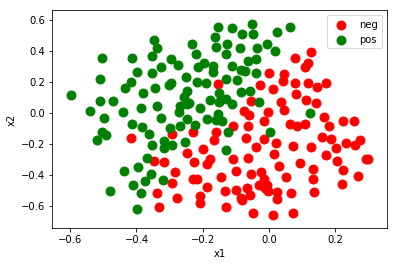

In [38]:
############################################################################
#  Part  4: Training SVM with a kernel                                     #
#  We train an SVM with an RBF kernel on the data set and the plot the     #
#  learned decision boundary                                               #
############################################################################

# load ex4data3.mat

X,y,Xval,yval = utils.loadval_mat('data/ex4data3.mat')

# transform y and yval from [0,1] to [-1,1]

yy = np.ones(y.shape)
yy[y == 0] = -1

yyval = np.ones(yval.shape)
yyval[yval == 0] = -1

# visualize the data

utils.plot_twoclass_data(X,y,'x1', 'x2',['neg','pos'])


############################################################################
# TODO                                                                     #
# select hyperparameters C and sigma for this dataset using                #
# Xval and yval                                                            #
############################################################################
Cvals = [0.01,0.03,0.1,0.3,1,3,10,30]
sigma_vals = [0.01,0.03,0.1,0.3,1,3,10,30]


# TODO       
# select hyperparameters here; loopover all Cvals and sigma_vals. 
# About 8-10 lines of code here
Best_accuracy = accuracy = best_sigma = best_C = 0
svm = LinearSVM_twoclass()
for sigma in sigma_vals:
    print(sigma)
    # compute the kernel (slow!)
    K = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X for x2 in X]).reshape(X.shape[0],X.shape[0])
    # scale the kernelized data matrix
    scaler = preprocessing.StandardScaler().fit(K)
    scaleK = scaler.transform(K)
    # add the intercept term
    KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T
    
    # compute the kernel (slow!)
    Kval = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in Xval for x2 in X]).reshape(Xval.shape[0],X.shape[0])
    # scale the kernelized data matrix
    scaler_val = preprocessing.StandardScaler().fit(Kval)
    scaleK_val = scaler.transform(Kval)
    # add the intercept term
    KKval = np.vstack([np.ones((scaleK_val.shape[0],)),scaleK_val.T]).T 
    
    for C in Cvals:     
        
        svm.theta = np.zeros((KK.shape[1],))
        svm.train(KK,yy,learning_rate=1e-4,reg=C,num_iters=20000,verbose=True,batch_size=KK.shape[0])
        predy = svm.predict(KKval)
        
        accuracy = np.mean(predy == yyval)
        
        if accuracy > Best_accuracy:
            Best_accuracy, best_C, best_sigma = accuracy, C, sigma
print(Best_accuracy, best_C, best_sigma )

############################################################################
#       END OF YOUR CODE                                                   #
############################################################################




In [39]:
print(Best_accuracy, best_C, best_sigma )

0.96 0.3 0.1


iteration 0 / 20000: loss 0.300000
iteration 100 / 20000: loss 0.285489
iteration 200 / 20000: loss 0.270980
iteration 300 / 20000: loss 0.256473
iteration 400 / 20000: loss 0.241966
iteration 500 / 20000: loss 0.227461
iteration 600 / 20000: loss 0.212957
iteration 700 / 20000: loss 0.198455
iteration 800 / 20000: loss 0.183954
iteration 900 / 20000: loss 0.169455
iteration 1000 / 20000: loss 0.155558
iteration 1100 / 20000: loss 0.144168
iteration 1200 / 20000: loss 0.135016
iteration 1300 / 20000: loss 0.127292
iteration 1400 / 20000: loss 0.121115
iteration 1500 / 20000: loss 0.116009
iteration 1600 / 20000: loss 0.111711
iteration 1700 / 20000: loss 0.108210
iteration 1800 / 20000: loss 0.104935
iteration 1900 / 20000: loss 0.101914
iteration 2000 / 20000: loss 0.099190
iteration 2100 / 20000: loss 0.096818
iteration 2200 / 20000: loss 0.094710
iteration 2300 / 20000: loss 0.092717
iteration 2400 / 20000: loss 0.091048
iteration 2500 / 20000: loss 0.089465
iteration 2600 / 20000: 

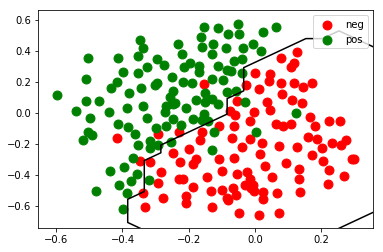

In [40]:
# TODO: make sure you put in the best_C and best_sigma from the analysis above!


C = best_C
sigma = best_sigma

# train an SVM on (X,y) with best_C and best_sigma
best_svm = LinearSVM_twoclass()

############################################################################
# TODO: construct the Gram matrix of the data with best_sigma, scale it, add the column of ones
# Then use svm_train to train best_svm with the best_C parameter. Use 20,000 iterations and
# a learning rate of 1e-4. Use batch_size of the entire training data set.
# About 5-6 lines of code expected here.
############################################################################

# compute the kernel (slow!)

K = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X for x2 in X]).reshape(X.shape[0],X.shape[0])

# scale the kernelized data matrix

scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)

# add the intercept term

KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T

best_svm.theta = np.zeros((KK.shape[1],))
best_svm.train(KK,yy,learning_rate=1e-4,reg=C,num_iters=20000,verbose=True,batch_size=KK.shape[0])


############################################################################
#       END OF YOUR CODE                                                   #
############################################################################

# visualize the boundary (uncomment this line after you learn the best svm)

utils.plot_decision_kernel_boundary(X,y,scaler,best_sigma,best_svm,'','',['neg','pos'])